In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #...
import math
myplate=sns.color_palette("Paired")
sns.set(style='white', palette=myplate)

import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings("ignore")
clrs = ["#ADD8E6","#FF0000"]
mypalette = sns.set_palette(sns.color_palette(clrs))

print('^^Importing Important Stuff^^')

^^Importing Important Stuff^^


In [2]:
sal_path = "eda_data.csv"
sal = pd.read_csv(sal_path, index_col = 0)
sal.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,47,1,0,0,0,1,data scientist,na,2536,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,36,1,0,0,0,0,data scientist,na,4783,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,10,1,0,1,0,1,data scientist,na,3461,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,55,1,0,0,0,0,data scientist,na,3883,3
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,22,1,0,0,0,1,data scientist,na,2728,3


In [3]:
sal.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark,aws,excel,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,46.591644,0.528302,0.002695,0.225067,0.237197,0.522911,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.778815,0.499535,0.051882,0.417908,0.425651,0.499812,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


In [4]:
sal.isnull().sum()

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
hourly               0
employer_provided    0
min_salary           0
max_salary           0
avg_salary           0
company_txt          0
job_state            0
same_state           0
age                  0
python_yn            0
R_yn                 0
spark                0
aws                  0
excel                0
job_simp             0
seniority            0
desc_len             0
num_comp             0
dtype: int64

In [5]:
cate = []
nume = []
for column in sal.columns:
    if sal[column].dtypes == 'object':
        cate.append(column)
    else:
        nume.append(column)
        
cate= ['Job Title',
 'Company Name',
 'Location',
 'Headquarters',
 'Size',
 'Type of ownership',
 'Industry',
 'Sector',
 'Revenue',
 'Competitors',
 'job_state',
 'job_simp',
 'seniority']

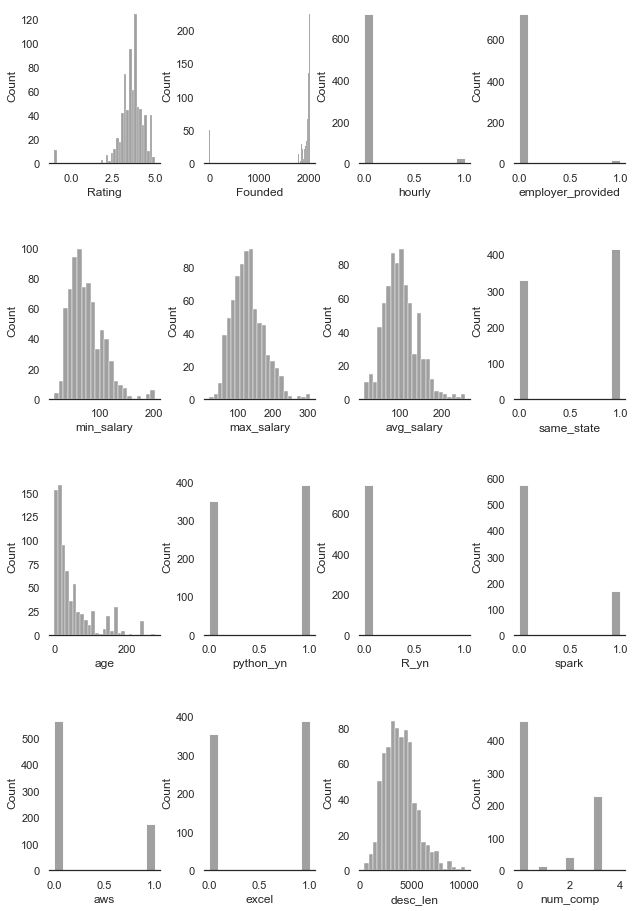

In [6]:
m=math.ceil(math.sqrt(len(nume)))
n=math.ceil(len(nume)/m)


fig, axes = plt.subplots(m,n,figsize=(10,15))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.5)
sns.despine(left=True)
for i in range(m):
    for j in range(n):
        sns.histplot(ax=axes[i,j], data=sal, x=nume[i*n+j], color = 'grey')
        if i*n+j==len(nume)-1:
            break

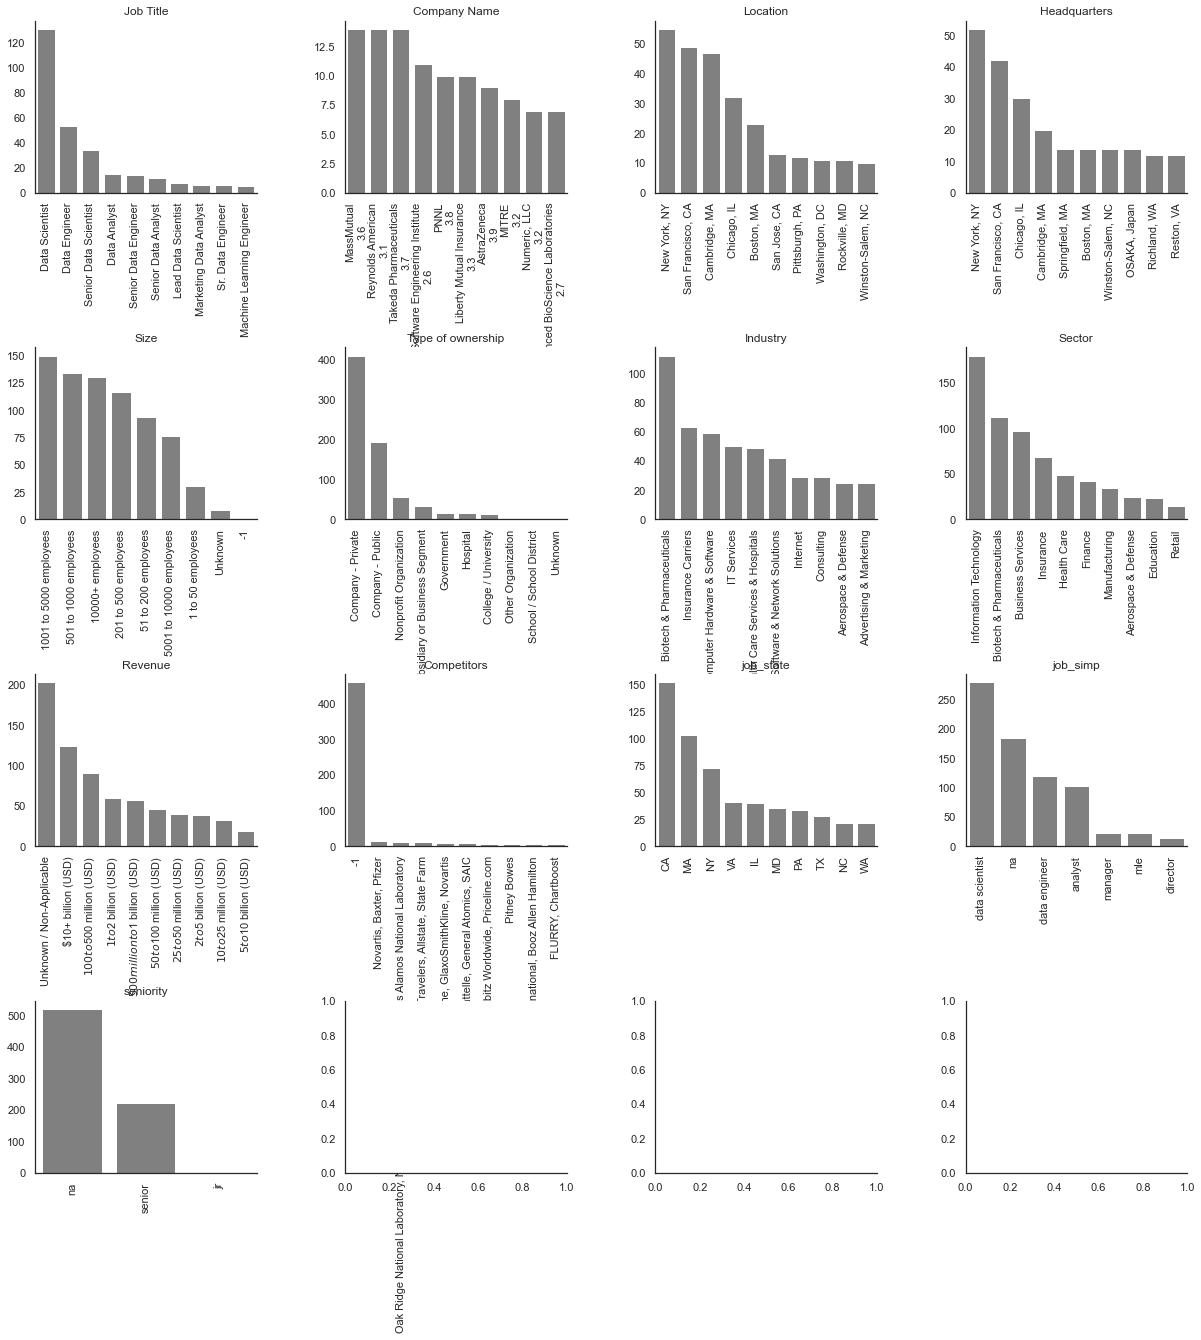

In [7]:
m=math.ceil(math.sqrt(len(cate)))
n=math.ceil(len(cate)/m)
fig, axes = plt.subplots(m,n,figsize=(20,20))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.9)

sns.despine()
for i in range(m):
    for j in range(n):
        sns.barplot(x= sal[cate[i*n+j]].value_counts()[:10].index,
                    y= sal[cate[i*n+j]].value_counts()[:10].values,
                   ax=axes[i,j], color = 'grey')
        axes[i,j].tick_params(axis='x', labelrotation=90)
        axes[i,j].title.set_text(cate[i*n+j])
        if i*n+j==len(cate)-1:
            break

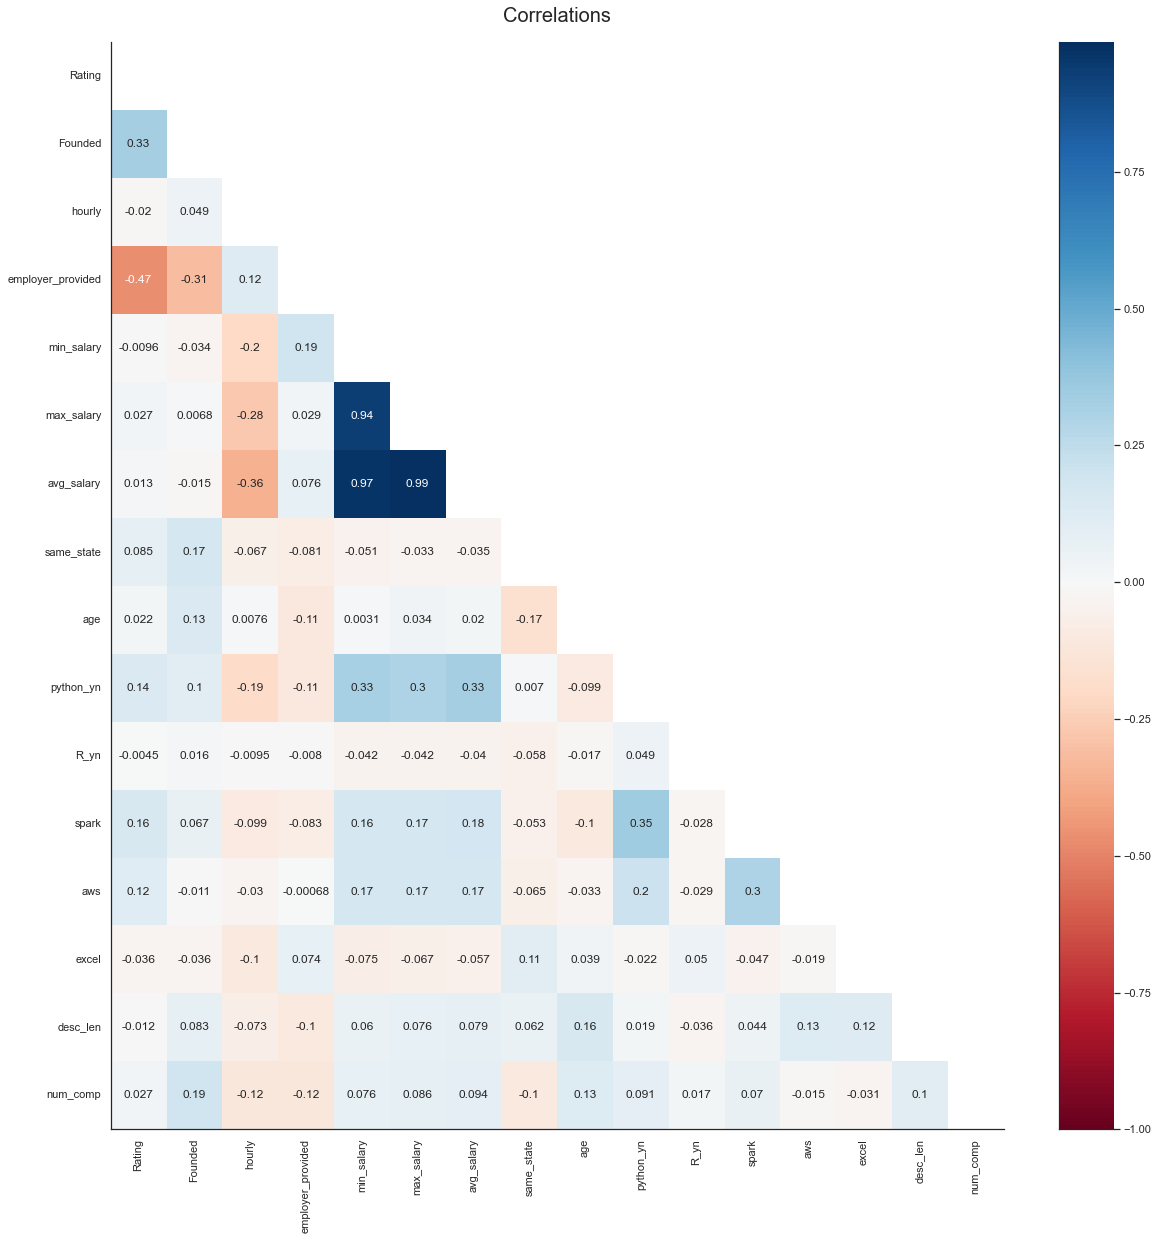

In [8]:
plt.figure(figsize= (20,20))
sns.heatmap(sal.corr(),vmin = -1, cmap = 'RdBu', annot = True, mask = np.triu(np.ones_like(sal.corr())))
plt.title('Correlations', fontsize = 20, pad = 20)
sns.despine()
plt.show()

<Figure size 1440x1440 with 0 Axes>

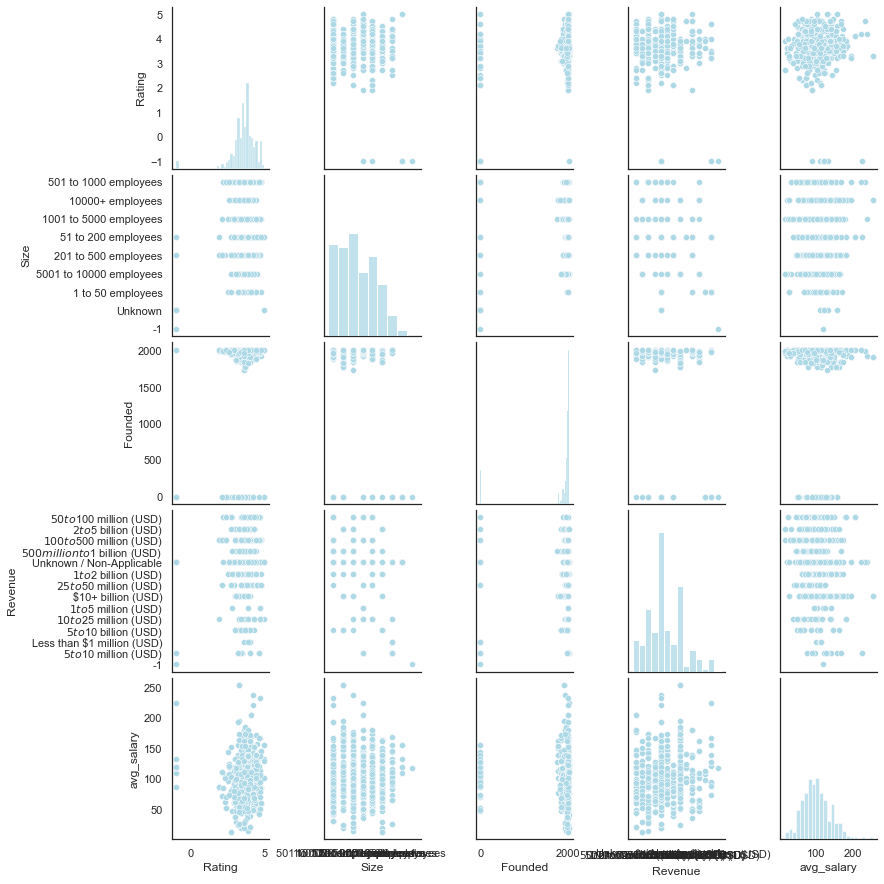

In [9]:
plt.figure(figsize= (20,20))
sns.pairplot(sal, x_vars = ['Rating', 'Size', 'Founded', 'Revenue', 'avg_salary'], y_vars = ['Rating', 'Size', 'Founded', 'Revenue', 'avg_salary'])
sns.despine()
plt.show()

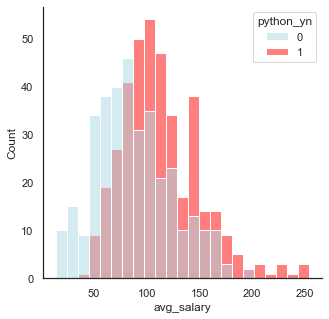

In [10]:
plt.figure(figsize= (5,5))
sns.histplot(data = sal, x = 'avg_salary', hue = 'python_yn')
sns.despine()
plt.show()

In [11]:
salary = pd.read_csv('salary_data_cleaned.csv')
# 742 rows × 28 columns
salary.head(2)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,NM,0,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n,MD,0,36,1,0,0,0,0


In [12]:
salary['Job Title'].value_counts()
# all Job Title are jobs of data science.

Data Scientist                     131
Data Engineer                       53
Senior Data Scientist               34
Data Analyst                        15
Senior Data Engineer                14
                                  ... 
Data Scientist/ML Engineer           1
Sr. Data Scientist                   1
Data Engineer 4 - Contract           1
Data Analyst - Asset Management      1
Machine Learning Engineer (NLP)      1
Name: Job Title, Length: 264, dtype: int64

In [13]:
high_salary_100 = salary['avg_salary'].sort_values(ascending=False).head(100)
high_salary_100
# avg_salary to 100th in high ranking 254.0 ~ 142.5

354    254.0
528    254.0
708    254.0
103    237.5
429    232.5
       ...  
423    143.5
57     143.5
24     143.0
255    143.0
42     142.5
Name: avg_salary, Length: 100, dtype: float64

In [14]:
low_salary_100 = salary['avg_salary'].sort_values().head(100)
low_salary_100
# avg_salary to 100th in low ranking 13.5 ~ 61.0

618    13.5
409    13.5
240    15.5
210    20.0
246    20.5
       ... 
475    61.0
150    61.0
329    61.0
8      61.0
275    61.0
Name: avg_salary, Length: 100, dtype: float64

In [15]:
# select and labeling for high_salary data 

high_salary_100.index

Int64Index([354, 528, 708, 103, 429, 176, 266, 613, 195, 330, 476, 616, 410,
            681, 507, 473,  46, 193, 328, 471, 585, 377,  71, 446,  91, 619,
            494, 667, 608, 496, 226, 159, 283, 220, 155, 133, 549, 637, 375,
            565, 474, 314, 440, 219, 154,  10, 243, 298, 395, 698, 600, 518,
            178, 627, 270, 416, 109, 256, 373,  45, 676, 662, 448, 488, 336,
            342,  56, 503,  17, 137, 691, 433, 514, 259, 172,  76, 168, 250,
            443, 318, 281, 183, 626,  38, 130, 462, 179, 272, 291, 185,  15,
            459, 234, 163, 451, 423,  57,  24, 255,  42],
           dtype='int64')

In [16]:
high_salary_100_data = salary.loc[high_salary_100.index]
high_salary_100_data.head(2)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
354,"Director II, Data Science - GRM Actuarial",$202K-$306K (Glassdoor est.),Advance your career at Liberty Mutual Insuranc...,3.3,Liberty Mutual Insurance\n3.3,"Chicago, IL","Boston, MA",10000+ employees,1912,Company - Private,...,254.0,Liberty Mutual Insurance\n,IL,0,108,1,0,0,0,0
528,"Director II, Data Science - GRM Actuarial",$202K-$306K (Glassdoor est.),Advance your career at Liberty Mutual Insuranc...,3.3,Liberty Mutual Insurance\n3.3,"Chicago, IL","Boston, MA",10000+ employees,1912,Company - Private,...,254.0,Liberty Mutual Insurance\n,IL,0,108,1,0,0,0,0


In [17]:
high_salary_100_data['salary_grade'] = 'high'
high_salary_100_data.head(2)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel,salary_grade
354,"Director II, Data Science - GRM Actuarial",$202K-$306K (Glassdoor est.),Advance your career at Liberty Mutual Insuranc...,3.3,Liberty Mutual Insurance\n3.3,"Chicago, IL","Boston, MA",10000+ employees,1912,Company - Private,...,Liberty Mutual Insurance\n,IL,0,108,1,0,0,0,0,high
528,"Director II, Data Science - GRM Actuarial",$202K-$306K (Glassdoor est.),Advance your career at Liberty Mutual Insuranc...,3.3,Liberty Mutual Insurance\n3.3,"Chicago, IL","Boston, MA",10000+ employees,1912,Company - Private,...,Liberty Mutual Insurance\n,IL,0,108,1,0,0,0,0,high


In [18]:
# select and labeling for low_salary data 

low_salary_100_data = salary.loc[low_salary_100.index]
low_salary_100_data['salary_grade'] = 'low'
low_salary_100_data.head(2)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel,salary_grade
618,"Senior Operations Data Analyst, Call Center Op...",$10-$17 Per Hour(Glassdoor est.),Summary\n\n\nIndependent contributor role that...,2.7,FLEETCOR\n2.7,"Nashville, TN","Peachtree Corners, GA",5001 to 10000 employees,2000,Company - Public,...,FLEETCOR\n,TN,0,20,0,0,0,0,1,low
409,"Senior Operations Data Analyst, Call Center Op...",$10-$17 Per Hour(Glassdoor est.),Summary\n\n\nIndependent contributor role that...,2.7,FLEETCOR\n2.7,"Nashville, TN","Peachtree Corners, GA",5001 to 10000 employees,2000,Company - Public,...,FLEETCOR\n,TN,0,20,0,0,0,0,1,low


In [19]:
high_low_salary_200 = pd.concat([high_salary_100_data, low_salary_100_data])
high_low_salary_200.tail(2)
# 200 rows × 29 columns

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel,salary_grade
8,Research Scientist,$38K-$84K (Glassdoor est.),SUMMARY\n\nThe Research Scientist I will be ta...,3.3,Rochester Regional Health\n3.3,"Rochester, NY","Rochester, NY",10000+ employees,2014,Hospital,...,Rochester Regional Health\n,NY,1,6,0,0,0,0,0,low
275,Excel / VBA / SQL Data Analyst,$44K-$78K (Glassdoor est.),Excel / VBA / SQL Data Analyst\n\nLocation:\nH...,4.1,Associated Electric Cooperative\n4.1,"Springfield, MO","Springfield, MO",501 to 1000 employees,1961,Company - Private,...,Associated Electric Cooperative\n,MO,1,59,0,0,0,0,1,low


In [20]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [21]:
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px

In [22]:
fig = px.box(high_low_salary_200, x="salary_grade", y="Rating", points="all")
fig.show()

In [23]:
fig = px.box(high_low_salary_200, x="salary_grade", y="Founded", points="all")
fig.show()

In [24]:
fig = px.box(high_low_salary_200, x="salary_grade", y="age", points="all")
fig.show()

In [25]:
fig = px.box(high_low_salary_200, x="salary_grade", y="avg_salary", points="all")
fig.show()

In [26]:
import plotly.express as ex

ex.pie(high_salary_100_data, names='Job Title',title='high salary Job',hole=0.3, width=1000, height=800)

In [27]:
ex.pie(low_salary_100_data, names='Job Title',title='low salary Job',hole=0.3, width=1000, height=800)

In [28]:
high_low_salary_200.groupby('salary_grade')['python_yn'].sum()

salary_grade
high    73
low     20
Name: python_yn, dtype: int64

In [29]:
high_low_salary_200.groupby('salary_grade')['R_yn'].sum()

salary_grade
high    0
low     1
Name: R_yn, dtype: int64

In [30]:
high_low_salary_200.groupby('salary_grade')['spark'].sum()

salary_grade
high    36
low      6
Name: spark, dtype: int64

In [31]:
high_low_salary_200.groupby('salary_grade')['aws'].sum()

salary_grade
high    38
low     12
Name: aws, dtype: int64

In [32]:
high_low_salary_200.groupby('salary_grade')['excel'].sum()

salary_grade
high    56
low     52
Name: excel, dtype: int64

In [34]:
high_low_salary_200_location = high_low_salary_200[['Location', 'min_salary', 'max_salary', 'avg_salary', 'salary_grade']]
high_low_salary_200_location.head()

,Location,min_salary,max_salary,avg_salary,salary_grade
354,"Chicago, IL",202,306,254.0,high
528,"Chicago, IL",202,306,254.0,high
708,"Chicago, IL",202,306,254.0,high
103,"Washington, DC",200,275,237.5,high
429,"San Francisco, CA",176,289,232.5,high


In [35]:
v_split = high_low_salary_200_location.Location.str.split(', ')
v_split.head()

354          [Chicago, IL]
528          [Chicago, IL]
708          [Chicago, IL]
103       [Washington, DC]
429    [San Francisco, CA]
Name: Location, dtype: object

In [36]:
high_low_salary_200_location['city'] = v_split.str.get(0)
high_low_salary_200_location['state'] = v_split.str.get(1)
high_low_salary_200_location = high_low_salary_200_location.drop(['Location'], axis=1)
high_low_salary_200_location

,min_salary,max_salary,avg_salary,salary_grade,city,state
354,202,306,254.0,high,Chicago,IL
528,202,306,254.0,high,Chicago,IL
708,202,306,254.0,high,Chicago,IL
103,200,275,237.5,high,Washington,DC
429,176,289,232.5,high,San Francisco,CA
...,...,...,...,...,...,...
475,42,80,61.0,low,Chicago,IL
150,44,78,61.0,low,Clearwater,FL
329,42,80,61.0,low,Chicago,IL
8,38,84,61.0,low,Rochester,NY


In [37]:
high_salary_location = high_low_salary_200_location[high_low_salary_200_location['salary_grade']=='high']
high_salary_location

,min_salary,max_salary,avg_salary,salary_grade,city,state
354,202,306,254.0,high,Chicago,IL
528,202,306,254.0,high,Chicago,IL
708,202,306,254.0,high,Chicago,IL
103,200,275,237.5,high,Washington,DC
429,176,289,232.5,high,San Francisco,CA
...,...,...,...,...,...,...
423,111,176,143.5,high,Saint Louis,MO
57,111,176,143.5,high,Saint Louis,MO
24,109,177,143.0,high,Herndon,VA
255,109,177,143.0,high,Herndon,VA


In [38]:
low_salary_location = high_low_salary_200_location[high_low_salary_200_location['salary_grade']=='low']
low_salary_location

,min_salary,max_salary,avg_salary,salary_grade,city,state
618,10,17,13.5,low,Nashville,TN
409,10,17,13.5,low,Nashville,TN
240,15,16,15.5,low,Port Washington,NY
210,15,25,20.0,low,New Orleans,LA
246,17,24,20.5,low,West Reading,PA
...,...,...,...,...,...,...
475,42,80,61.0,low,Chicago,IL
150,44,78,61.0,low,Clearwater,FL
329,42,80,61.0,low,Chicago,IL
8,38,84,61.0,low,Rochester,NY


In [39]:
ex.pie(high_salary_location, names='state',title='high salary state',hole=0.3, width=500, height=500)

In [40]:
ex.pie(high_salary_location, names='city',title='high salary city',hole=0.3, width=800, height=800)

In [41]:
ex.pie(low_salary_location, names='state',title='low salary state',hole=0.3, width=500, height=500)

In [42]:
ex.pie(low_salary_location, names='city',title='low salary city',hole=0.3, width=800, height=800)